In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import os as os
import tensorflow as ts
import tensorflow.keras as ks
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Read in Data


In [9]:
# read in data
df = pd.read_csv("./processed_data/pca_data.csv", index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cinderella                 478 non-null    float64
 1   Number of Tournament Wins  478 non-null    float64
 2   3pt_0                      478 non-null    float64
 3   Free Throw-Rebound_0       478 non-null    float64
 4   Free Throw-Rebound_1       478 non-null    float64
 5   Free Throw-Rebound_2       478 non-null    float64
 6   Region_0                   478 non-null    float64
 7   PPG_0                      478 non-null    float64
 8   PPG_1                      478 non-null    float64
 9   Scoring Differential_0     478 non-null    float64
 10  Assist_0                   478 non-null    float64
 11  Schedule_0                 478 non-null    float64
 12  Win-Loss_0                 478 non-null    float64
dtypes: float64(13)
memory usage: 52.3 KB


## Create Model

### Neural Network

- Several fully-connected layers
    - Try 256, 128, 64, 32, 7/11

#### Output

##### Win-based

- 7 output nodes, predict number of wins (0-6)
- Apply softmax function at end to get probability

##### Rank-based

- Find the optimal ranking of teams for each year
- 11 output nodes, predict which rank (0-10) the team should be placed in

In [132]:
X = df.drop(columns=['Cinderella','Number of Tournament Wins'])
# y = df[['Cinderella','Number of Tournament Wins']]
y = pd.get_dummies(df['Number of Tournament Wins'])

In [133]:
model_1 = ks.Sequential()

In [134]:
model_1.add(layers.Input(shape=X.shape[1],))

In [135]:
model_1.add(layers.Dropout(0.1))

In [136]:
model_1.add(layers.Dense(256, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [137]:
model_1.add(layers.Dropout(0.1))

In [138]:
model_1.add(layers.Dense(128, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [139]:
model_1.add(layers.Dropout(0.1))

In [140]:
model_1.add(layers.Dense(64, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [141]:
model_1.add(layers.Dropout(0.1))

In [142]:
model_1.add(layers.Dense(32, activation='relu', kernel_regularizer = ks.regularizers.l2(1e-4)))

In [143]:
model_1.add(layers.Dense(7, activation='softmax'))

In [144]:
model_1.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [145]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               3072      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)              

In [146]:
ks.utils.plot_model(model_1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [147]:
res = model_1.fit(X,y, epochs = 200, batch_size = 32)

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 1.8149 - accuracy: 0.3766 
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.5272
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.2792 - accuracy: 0.5377
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.2163 - accuracy: 0.5418
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.5565
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1467 - accuracy: 0.5502
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1538 - accuracy: 0.5481
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1112 - accuracy: 0.5837
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0985 - accuracy: 0.5879
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.5753
Epoch 11

15/15 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.8033
Epoch 84/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.7594
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.8096
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.8264
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7720
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.8159
Epoch 89/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.8075
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.8075
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.8033
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.8180
Epoch 93/200


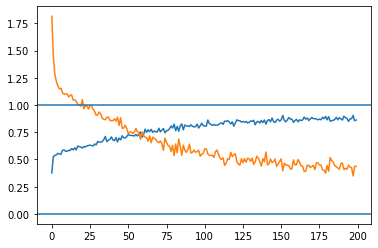

In [151]:
plt.plot(res.epoch, res.history['accuracy'])
plt.plot(res.epoch, res.history['loss'])
plt.axhline(y=0)
plt.axhline(y=1)
plt.show()

## Validate Results

- Want to pick several Cinderella teams for bottom 4-6 predictions
